In [1]:
#import libreries
# -*- coding: utf-8 -*-
import seaborn as sns #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
%matplotlib inline
#import geopandas as gpd
import pylab
#t-test for dependent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy import stats as st
from scipy.stats import t
from scipy.stats import mannwhitneyu
from math import log10

**Descriptive analyst**

In [3]:
#Carga de archivos
file = pd.read_excel(r'D:\Documents\Recursos_hidricos\TESIS\XLS\Analisis_v2_19_07_02\Analisis_E_W.xlsx', sheet_name='python_21_04')
file.describe()#estadística descriptiva

,Grupo,DKp E,DKp W,VOKp E,VOKp W,SKp E,SKp W,MECh E,MECh W,DMKsn E,DMKsn W,LON,LAT
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,28.295455,4.069798,4.071727,90.709555,79.413272,0.155862,0.126748,1079.875105,1041.278063,3.860389,4.013512,-72.402640,-42.728617
std,15.887072,2.271209,1.714510,49.243930,62.817631,0.088293,0.064253,272.999519,302.544878,3.281557,2.135025,0.572219,2.408292
min,2.000000,0.724158,1.065228,28.189295,20.190580,0.050859,0.030780,519.142612,496.423079,0.421897,0.794775,-73.558054,-46.458468
25%,15.750000,2.399625,2.796931,57.675419,41.810247,0.100862,0.082262,856.812125,813.489853,1.283255,2.130399,-72.832308,-44.803079
50%,28.500000,3.542533,3.587199,81.125996,59.368279,0.130230,0.111279,1069.570393,1027.994728,3.000473,3.534688,-72.388983,-43.225437
75%,41.250000,4.708212,5.024140,102.954381,82.228435,0.189717,0.152948,1251.348409,1248.499998,5.316377,5.697579,-71.949856,-40.110530
max,57.000000,11.130284,8.686712,247.537154,323.034570,0.420273,0.346272,1594.210741,1692.713614,14.727468,8.467359,-71.385226,-38.635755


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

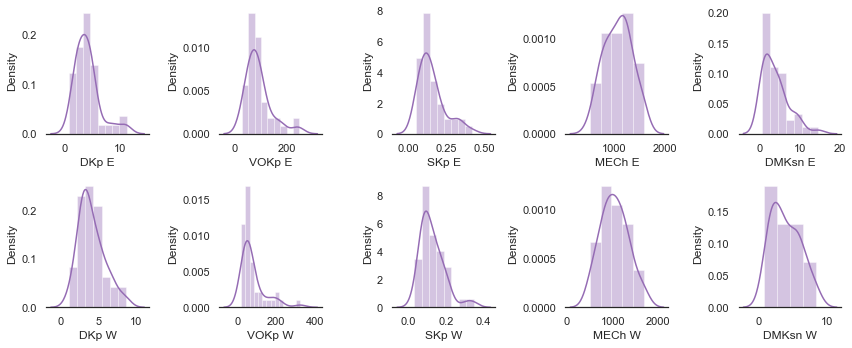

In [4]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 5, figsize=(12, 5))
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(file['DKp E'], color="m", ax=axes[0, 0], norm_hist = True)
sns.distplot(file['DKp W'], color="m", ax=axes[1, 0])
sns.distplot(file['VOKp E'], color="m", ax=axes[0, 1])
sns.distplot(file['VOKp W'], color="m", ax=axes[1, 1])
sns.distplot(file['SKp E'], color="m", ax=axes[0, 2])
sns.distplot(file['SKp W'], color="m", ax=axes[1, 2])
sns.distplot(file['MECh E'], color="m", ax=axes[0, 3])
sns.distplot(file['MECh W'], color="m", ax=axes[1, 3])
sns.distplot(file['DMKsn E'], color="m", ax=axes[0, 4])
sns.distplot(file['DMKsn W'], color="m", ax=axes[1, 4])


#plt.setp(axes, yticks=[])
plt.tight_layout()

**Shapiro Wilk test**

In [5]:
# Aplicando test
stat1, p1 = st.shapiro(file['DKp E'])#test shapiro week
stat2, p2 = st.shapiro(file['DKp W'])
stat3, p3 = st.shapiro(file['VOKp E'])
stat4, p4 = st.shapiro(file['VOKp W'])
stat5, p5 = st.shapiro(file['SKp E'])
stat6, p6 = st.shapiro(file['SKp W'])
stat7, p7 = st.shapiro(file['MECh E'])
stat8, p8 = st.shapiro(file['MECh W'])
stat9, p9 = st.shapiro(file['DMKsn E'])
stat10, p10 = st.shapiro(file['DMKsn W'])

#Create DataFrame

n = {'parameter':['stat','p-Value'],
    'DKp E':[stat1, p1],
    'DKp W':[stat2, p2],
    'VOKp E':[stat3, p3],
    'VOKp W':[stat4, p4],
    'SKp E':[stat5, p5],
    'SKp W':[stat6, p6],
    'MECh E':[stat7, p7],
    'MECh W':[stat8, p8],
    'DMKsn E':[stat9, p9],
    'DMKsn W':[stat10, p10]}

norm_general = pd.DataFrame(data=n)
norm_general = norm_general.round(5)
norm_general = norm_general.set_index('parameter')
norm_general = norm_general.T
norm_general.interpreter = []

# Interpretación
alpha = 0.05

norm_general.loc[norm_general['p-Value'] >= alpha,'interpreter'] = 'Accept Ho' #normal distribution
norm_general.loc[norm_general['p-Value'] < alpha,'interpreter'] = 'Reject Ho' #non-normal distribution'

#Finish dataframe

norm_general = norm_general.T

norm_general

<ipython-input-5-b04a85b412ca>:31: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  norm_general.interpreter = []


,DKp E,DKp W,VOKp E,VOKp W,SKp E,SKp W,MECh E,MECh W,DMKsn E,DMKsn W
parameter,,,,,,,,,,
stat,0.86152,0.94795,0.8628,0.74463,0.87466,0.89061,0.97749,0.9822,0.87219,0.9498
p-Value,9e-05,0.04617,9e-05,0,0.0002,0.00057,0.53629,0.72186,0.00017,0.05408
interpreter,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Accept Ho,Accept Ho,Reject Ho,Accept Ho


**Mann - whitney test and T-students**

In [25]:
stat11, p11 = mannwhitneyu(file['DKp E'], file['DKp W'])
stat12, p12 = mannwhitneyu(file['VOKp E'], file['VOKp W'])
stat13, p13 = mannwhitneyu(file['SKp E'], file['SKp W'])
stat14, p14 = mannwhitneyu(file['MECh E'], file['MECh W'])
stat15, p15 = mannwhitneyu(file['DMKsn E'], file['DMKsn W'])
stat16, p16 = st.ttest_rel(file['MECh E'], file['MECh W'])

p11=p11*2
p12=p12*2
p13=p13*2
p14=p14*2
p15=p15*2

n2 = {'parameter':['stat','p-Value'],
    'DKp':[stat11, p11],
    'VOKp':[stat12, p12],
    'SKp':[stat13, p13],
    'MECh':[stat14, p14],
    'DMKsn':[stat15, p15],
    'MECh_T':[stat16, p16]}

stats_data = pd.DataFrame(data=n2)
stats_data = stats_data.round(5)
stats_data = stats_data.set_index('parameter')
stats_data = stats_data.T
stats_data.interpreter = []

# Interpretación
alpha = 0.05

stats_data.loc[stats_data['p-Value'] >= alpha,'interpreter'] = 'Accept Ho' #same distributions
stats_data.loc[stats_data['p-Value'] < alpha,'interpreter'] = 'Reject Ho' #diferent distribution

#Finish dataframe

stats_data = stats_data.T

stats_data

<ipython-input-25-7639b47ba6a8>:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stats_data.interpreter = []


,DKp,VOKp,SKp,MECh,DMKsn,MECh_T
parameter,,,,,,
stat,896,688,795,886,817,0.91068
p-Value,0.55071,0.01967,0.14999,0.49641,0.20913,0.36754
interpreter,Accept Ho,Reject Ho,Accept Ho,Accept Ho,Accept Ho,Accept Ho


**Spearman r Correlation**

In [26]:
#Spearman r Correlation
stat11, p11 = st.spearmanr(file['DKp E'], file['DKp W'])
stat12, p12 = st.spearmanr(file['VOKp E'], file['VOKp W'])
stat13, p13 = st.spearmanr(file['SKp E'], file['SKp W'])
stat14, p14 = st.spearmanr(file['MECh E'], file['MECh W'])
stat15, p15 = st.spearmanr(file['DMKsn E'], file['DMKsn W'])

n2 = {'parameter':['stat','p-Value'],
    'DKp':[stat11, p11],
    'VOKp':[stat12, p12],
    'SKp':[stat13, p13],
    'MECh':[stat14, p14],
    'DMKsn':[stat15, p15]}

stats_data = pd.DataFrame(data=n2)
stats_data = stats_data.round(5)
stats_data = stats_data.set_index('parameter')
stats_data = stats_data.T
stats_data.interpreter = []

# Interpretación
alpha = 0.05

stats_data.loc[stats_data['p-Value'] >= alpha,'interpreter'] = 'Accept Ho' #same distributions
stats_data.loc[stats_data['p-Value'] < alpha,'interpreter'] = 'Reject Ho' #diferent distribution

#Finish dataframe

stats_data = stats_data.T

stats_data

<ipython-input-26-b42b41b7a061>:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stats_data.interpreter = []


,DKp,VOKp,SKp,MECh,DMKsn
parameter,,,,,
stat,0.49133,0.4334,0.4272,0.56561,-0.21395
p-Value,0.00071,0.00329,0.00383,6e-05,0.16315
interpreter,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Accept Ho


**Correlation graphics**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

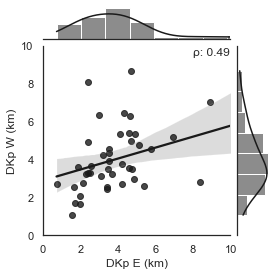

In [16]:
sns.set(style="white")

sns.jointplot( 
    'DKp E','DKp W', data=file, kind="reg",
                  xlim=(0, 10), ylim=(0, 10), color="k", height=4)
plt.xlabel('DKp E (km)', fontsize=12)
plt.ylabel('DKp W (km)', fontsize=12)
corr1= stat11
plt.annotate("ρ: "+str(round(corr1,2)), (0.8, 0.95), xycoords='axes fraction',fontsize=12);

plt.plot()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

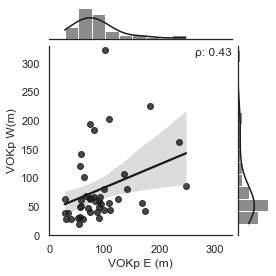

In [18]:
sns.set(style="white")

sns.jointplot( 
    'VOKp E','VOKp W', data=file, kind="reg",
                  xlim=(0, 330), ylim=(0, 330), color="k", height=4)
plt.xlabel('VOKp E (m)', fontsize=12)
plt.ylabel('VOKp W(m)', fontsize=12)
corr1= stat12
plt.annotate("ρ: "+str(round(corr1,2)), (0.8, 0.95), xycoords='axes fraction',fontsize=12);
plt.plot()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

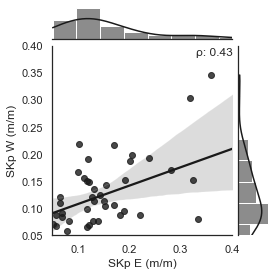

In [19]:
sns.set(style="white")

sns.jointplot( 
    'SKp E','SKp W', data=file, kind="reg",
                  xlim=(0.05, 0.4), ylim=(0.05, 0.4), color="k", height=4)
plt.xlabel('SKp E (m/m)', fontsize=12)
plt.ylabel('SKp W (m/m)', fontsize=12)
corr1= stat13
plt.annotate("ρ: "+str(round(corr1,2)), (0.8, 0.95), xycoords='axes fraction',fontsize=12);
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

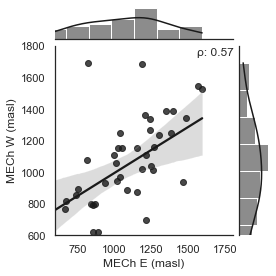

In [27]:
sns.set(style="white")

sns.jointplot( 
    'MECh E','MECh W', data=file, kind="reg",
                  xlim=(600, 1800), ylim=(600, 1800), color="k", height=4)
plt.xlabel('MECh E (masl)', fontsize=12)
plt.ylabel('MECh W (masl)', fontsize=12)
corr1= stat14
plt.annotate("ρ: "+str(round(corr1,2)), (0.8, 0.95), xycoords='axes fraction',fontsize=12);
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

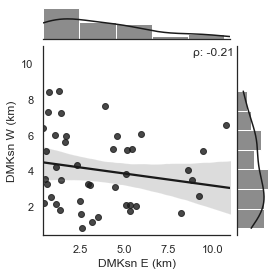

In [22]:
sns.set(style="white")

sns.jointplot( 
    'DMKsn E','DMKsn W', data=file, kind="reg",
                  xlim=(0.4, 11), ylim=(0.4, 11), color="k", height=4)
plt.xlabel('DMKsn E (km)', fontsize=12)
plt.ylabel('DMKsn W (km)', fontsize=12)
corr1= stat15
plt.annotate("ρ: "+str(round(corr1,2)), (0.8, 0.95), xycoords='axes fraction',fontsize=12);
plt.plot()